# X-Ray Images Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Load Labels of X-ray Images 
df = pd.read_csv('../sample/sample_labels.csv')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


In [3]:
df.describe()

,Follow-up #,Patient ID,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
count,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000
mean,8.616661,14330.617017,2644.795755,2491.087406,0.155467,0.155467
std,15.565815,8411.477789,347.188754,399.119063,0.016201,0.016201
min,0.000000,13.000000,1362.000000,966.000000,0.115000,0.115000
25%,0.000000,7289.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,2542.000000,2544.000000,0.143000,0.143000
75%,10.000000,20655.500000,2992.000000,2991.000000,0.168000,0.168000
max,177.000000,30797.000000,3266.000000,3056.000000,0.198800,0.198800


### Data Cleaning

In [5]:
# Drop unused columns except those below
df = df[['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]

# Create new columns for each decease
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

for pathology in pathology_list :
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

#### Patient Age

In [13]:
df['Age Type']=df['Patient Age'].apply(lambda x: x[-1:])
df['Age Type'].unique()  # => Y, M and D
# Ages expressed in Years, but also a few expressed in Months or in Days
print('Ages in Years: ',df[df['Age Type']=='Y']['Patient ID'].count())
print('Ages in Month: ',df[df['Age Type']=='M']['Patient ID'].count())  
print('Ages in Day: ',df[df['Age Type']=='D']['Patient ID'].count())

Ages in Years:  5604
Ages in Month:  1
Ages in Day:  1


In [14]:
# Remove character after patients age, and transform D and M in years
df['Age']=df['Patient Age'].apply(lambda x: x[:-1]).astype(int)

df.loc[df['Age Type']=='M',['Age']] = df[df['Age Type']=='M']['Age'].apply(lambda x: round(x/12.)).astype(int)
df.loc[df['Age Type']=='D',['Age']] = df[df['Age Type']=='D']['Age'].apply(lambda x: round(x/365.)).astype(int)
print(df[df['Age Type']=='D']['Age'])
df[df['Age Type']=='M']['Age']

4749    0
Name: Age, dtype: int64


3865    1
Name: Age, dtype: int64

In [15]:
df['Age'].sort_values(ascending=False).head(20)

4242    411
3745     94
1807     89
3573     89
3092     89
5403     88
47       87
4998     87
2140     86
1206     85
681      85
2356     85
1737     85
5364     85
189      85
600      84
35       84
1270     84
590      83
2428     83
Name: Age, dtype: int64

#### Display number of each deseases by patient gender

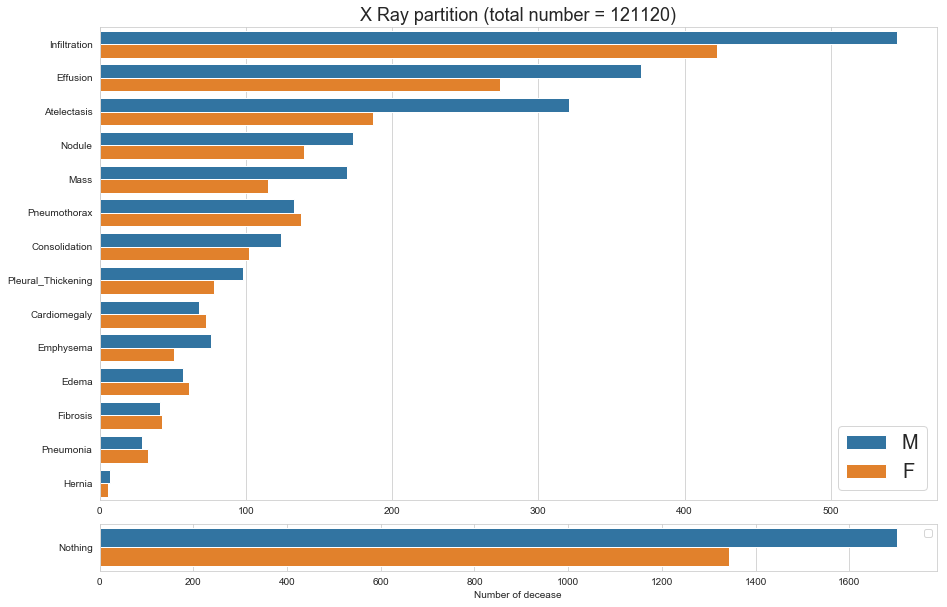

In [19]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition (total number = 121120)',fontsize=18);

df['Nothing']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

#### Now check age distribution by sex

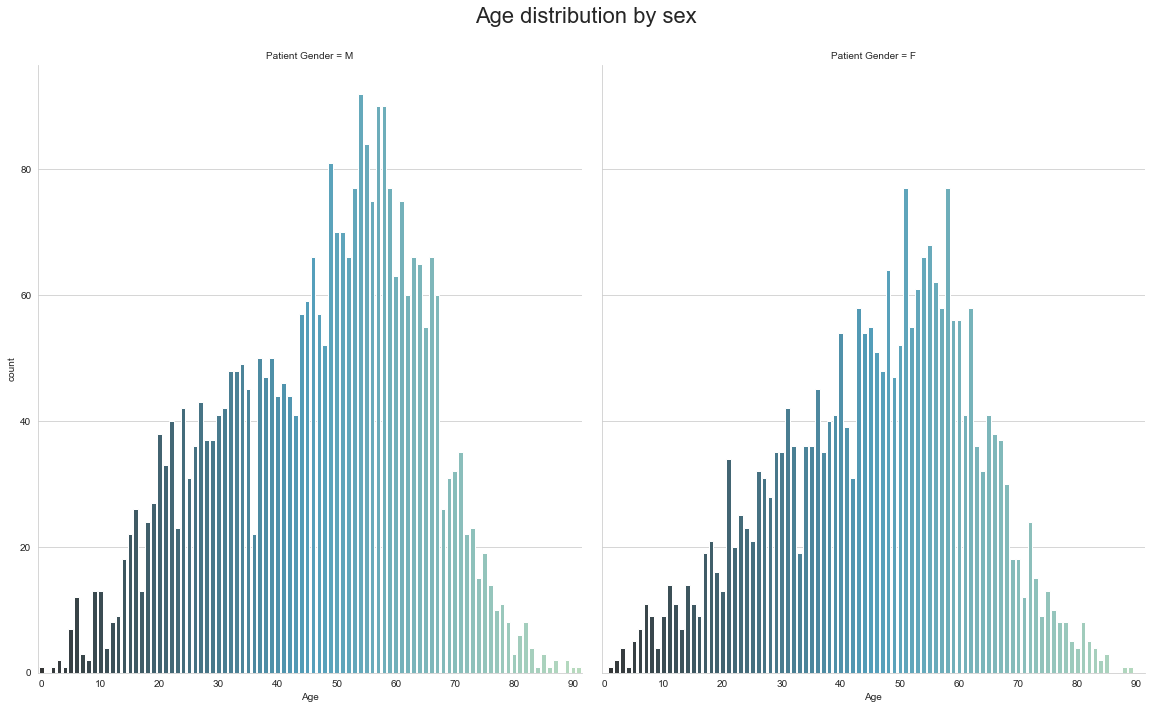

In [22]:
##########################################################
# Suppress some warnings I encountered with seaborn
import warnings
warnings.filterwarnings("ignore")
##########################################################

g = sns.factorplot(x="Age", col="Patient Gender",data=df, kind="count",size=10, aspect=0.8,palette="GnBu_d");
g.set_xticklabels(np.arange(0,100));
g.set_xticklabels(step=10);
g.fig.suptitle('Age distribution by sex',fontsize=22);
g.fig.subplots_adjust(top=.9)

#### Display pathologies distribution by age&sex

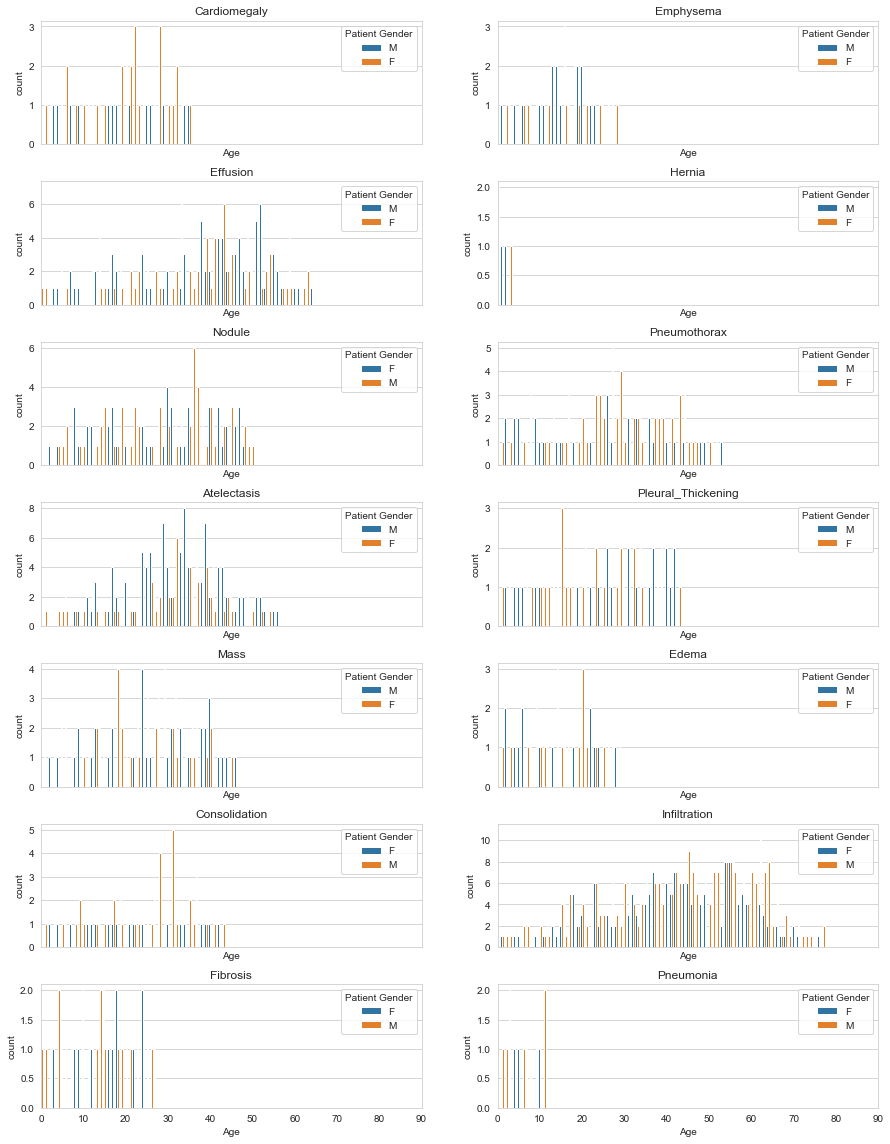

In [24]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))

i=0
j=0
x=np.arange(0,100,10)
for pathology in pathology_list :
    g=sns.countplot(x='Age', hue="Patient Gender",data=df[df['Finding Labels']==pathology], 
                    ax=axarr[i, j])
    axarr[i, j].set_title(pathology)   
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)

#### Display patient number by Follow-up in details

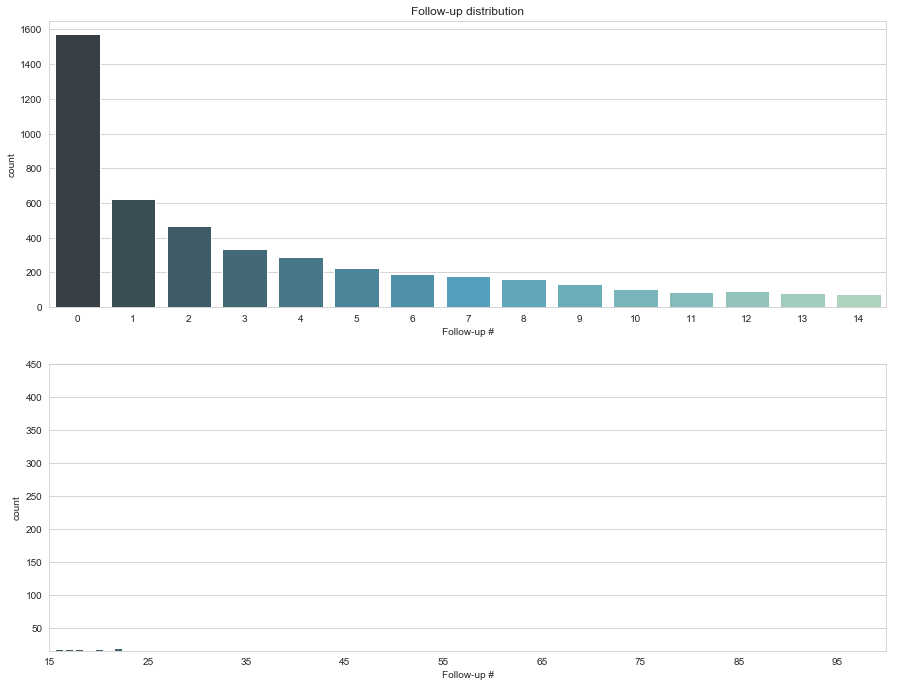

In [25]:
f, (ax1,ax2) = plt.subplots( 2, figsize=(15, 10))

data = df[df['Follow-up #']<15]
g = sns.countplot(x='Follow-up #',data=data,palette="GnBu_d",ax=ax1);

ax1.set_title('Follow-up distribution');
data = df[df['Follow-up #']>14]
g = sns.countplot(x='Follow-up #',data=data,palette="GnBu_d",ax=ax2);
x=np.arange(15,100,10)
g.set_ylim(15,450)
g.set_xlim(15,100)
g.set_xticks(x)
g.set_xticklabels(x)
f.subplots_adjust(top=1)

#### Try to find links between pathologies

In [26]:
#First display Top 10 multiple deseases
data=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False).head(23)
data=data[['|' in index for index in data.index.values]]
data

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,...,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Age Type,Age,Nothing
Finding Labels,,,,,,,,,,,,,,,,,,,,,
Effusion|Infiltration,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
Atelectasis|Infiltration,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
Atelectasis|Effusion,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
Infiltration|Nodule,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
Atelectasis|Effusion|Infiltration,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
Cardiomegaly|Effusion,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
Infiltration|Mass,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
Edema|Infiltration,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
Effusion|Pneumothorax,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


now we need to compare ratio between simple and multiple deseases

In [27]:
data=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=data[['|' in index for index in data.index]].copy()
df2=data[['|' not in index for index in data.index]]
df2=df2[['No Finding' not in index for index in df2.index]]
df2['Finding Labels']=df2.index.values
df1['Finding Labels']=df1.index.values

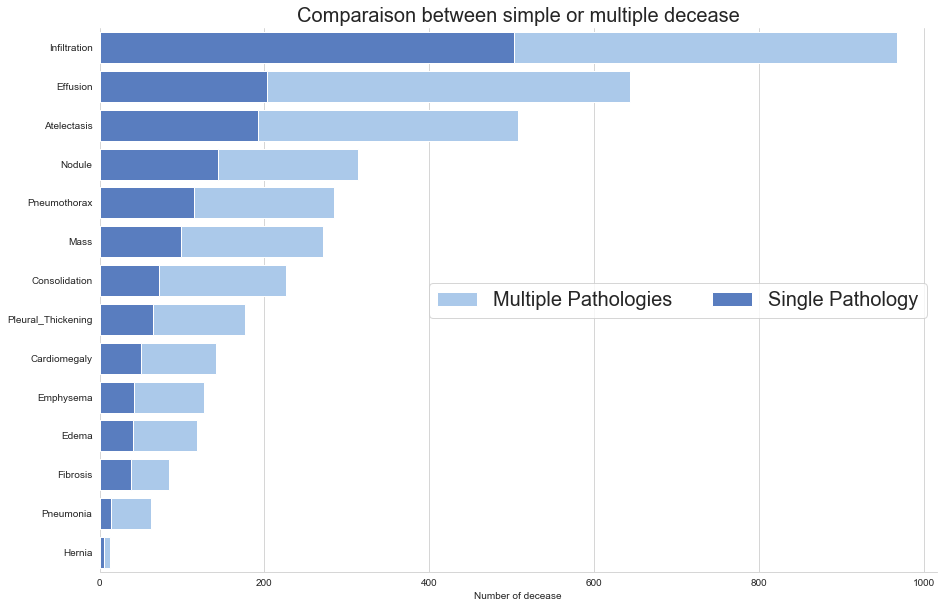

In [29]:
f, ax = plt.subplots(sharex=True,figsize=(15, 10))
sns.set_color_codes("pastel")
g=sns.countplot(y='Category',data=data1, ax=ax, 
                order = data1['Category'].value_counts().index,color='b',
                label="Multiple Pathologies")
sns.set_color_codes("muted")
g=sns.barplot(x='Patient ID',y='Finding Labels',data=df2, ax=ax, color="b",
              label="Single Pathology")
ax.legend(ncol=2, loc="center right", frameon=True,fontsize=20)
ax.set( ylabel="",xlabel="Number of decease")
ax.set_title("Comparaison between simple or multiple decease",fontsize=20)      
sns.despine(left=True)

Plot most important pathologies groups for each desease

In [31]:
#we just keep groups of pathologies which appear more than 30 times
df3=df1.loc[df1['Patient ID']>30,['Patient ID','Finding Labels']]

for pathology in pathology_list:
    df3[pathology]=df3.apply(lambda x: x['Patient ID'] if pathology in x['Finding Labels'] else 0, axis=1)

df3.head()

,Patient ID,Finding Labels,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
Finding Labels,,,,,,,,,,,,,,,,
Effusion|Infiltration,69,Effusion|Infiltration,0,0,69,0,0,0,0,0,0,0,0,69,0,0
Atelectasis|Infiltration,57,Atelectasis|Infiltration,0,0,0,0,0,0,57,0,0,0,0,57,0,0
Atelectasis|Effusion,55,Atelectasis|Effusion,0,0,55,0,0,0,55,0,0,0,0,0,0,0
Infiltration|Nodule,44,Infiltration|Nodule,0,0,0,0,44,0,0,0,0,0,0,44,0,0
Atelectasis|Effusion|Infiltration,31,Atelectasis|Effusion|Infiltration,0,0,31,0,0,0,31,0,0,0,0,31,0,0


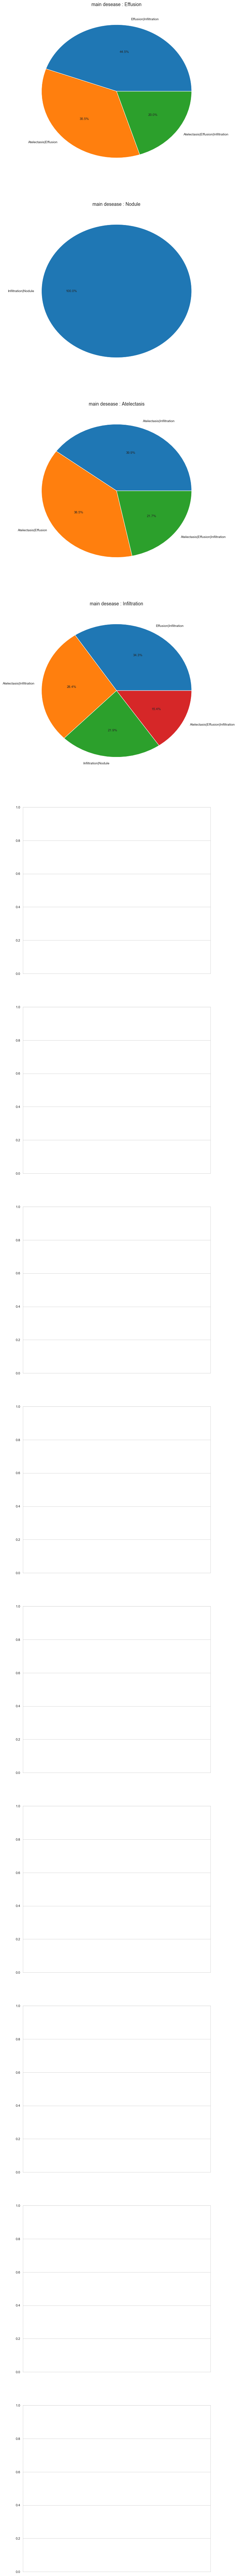

In [32]:
#'Hernia' has not enough values to figure here
df4=df3[df3['Hernia']>0]  # df4.size == 0
#remove 'Hernia' from list
pat_list=[elem for elem in pathology_list if 'Hernia' not in elem]

f, axarr = plt.subplots(13, sharex=True,figsize=(10, 140))
i=0
for pathology in pat_list :
    df4=df3[df3[pathology]>0]
    if df4.size>0:  #'Hernia' has not enough values to figure here
        axarr[i].pie(df4[pathology],labels=df4['Finding Labels'], autopct='%1.1f%%')
        axarr[i].set_title('main desease : '+pathology,fontsize=14)   
        i +=1

We can see that some pathologies seem to appear with all kind of pathology:

* Effusion <br>
* Aletectasis <br>
* Infiltration Some others seem to have favorite couple: <br>
* Cardiomegaly with Effusion <br>
* Emphysema with Pneumothorax <br>
* Nodule with Infiltration <br>
* Edema with Infiltration <br>
* Fibrosis with Infiltration <br>
* Pneumonia with Infiltration <br>